# 🏠 Mini-Project: Preprocess & Engineer Features on Ames Housing Dataset

> **Goal: Work with the [Ames Housing dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?select=AmesHousing.csv) to perform data preprocessing and create meaningful new features. You will:**
> - Handle **missing values**, **duplicates**, and **outliers**  
> - Detect and fix **skewness** in numerical features  
> - Encode categorical variables into numeric formats  
> - Create **non-linear features** (e.g., polynomial, log, interaction terms) from existing variables  
> - Save the cleaned and enriched dataset into a new CSV file  

<p align="center">📢⚠️📂</p>

<p align="center"> Please name your file using the format: <code>assignmentName_nickname.py/.ipynb</code> (e.g., <code>project2_rezashokrzad.py</code>) and push it to GitHub with a clear commit message.</p>

<p align="center"> 🚨📝🧠</p>


## 🔹 Step 1: Load the Dataset


In [2]:
# TODO: Load the Ames Housing dataset into a DataFrame.
# Hint: The dataset is available on Kaggle ("Ames Housing").
# After loading, display the first and last 5 rows to check if it worked.

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "AmesHousing.csv"

# Load the latest version
df1 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prevek18/ames-housing-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

pd.set_option('display.max_columns', None)

print("First 5 records:", df1.head())
print("Last 5 records:", df1.tail())

C:\Users\Parastoo\AppData\Local\Temp\ipykernel_15072\1234441213.py:15: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df1 = kagglehub.load_dataset(


First 5 records:    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Sty

## 🔹 Step 2: Exploratory Data Review (EDR)

In [8]:
# TODO: Perform initial exploration of the dataset.
# - Check shape, column names, smaples
# - Get summary info, data types
# - Descriptive statistics

df = df1.copy()
print(f"Shape: {df.shape}")
print(f"Columns Name: {df.columns}")
print(f"Sample of Records: {df.sample}")

df.info()
df.dtypes

print(df.describe())
print(df.describe(include='object'))

for col in df.columns:
    print(f"{col}: {df[col].unique()}")

print(df.nunique())

Shape: (2930, 82)
Columns Name: Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garag

## 🔹 Step 3: Missing Value Check & Handling

In [9]:
# TODO: Check missing values.
# Decide on a strategy (if needed):
# - Drop if too many are missing
# - Fill with mean/median/mode/domain-specific value

print(df.shape)
if 'Order' in df.columns:
    df.drop(columns=['Order'], inplace=True)
if 'PID' in df.columns:
    df.drop(columns=['PID'], inplace=True)
print(df.shape)
print("# of nulls at the begining: ", df.isnull().sum().sum())

# list columns with missing values
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)
# drop columns with more than 50% missing values
missing_pct = df.isnull().mean() * 100
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
df = df.drop(columns=cols_to_drop)
print("Shape after drop columns with >50% missing values: ", df.shape)
print("# of nulls after drop columns with >50% missing values: ", df.isnull().sum().sum())

col_cat = df.select_dtypes(include='object').columns
col_num = df.select_dtypes(exclude='object').columns
for col in col_num:
    df[col] = df[col].fillna(df[col].median())
print("# of nulls before Categurical filling: ", df.isnull().sum().sum())
for col in col_cat:
    mod = df[col].mode()
    mode_value = mod.iloc[0]        # pick the first mode
    df[col] = df[col].fillna(mode_value)
print("# of nulls at the end: ",df.isnull().sum().sum())


(2930, 82)
(2930, 80)
# of nulls at the begining:  15749
Shape after drop columns with >50% missing values:  (2930, 75)
# of nulls after drop columns with >50% missing values:  3143
# of nulls before Categurical filling:  2461
# of nulls at the end:  0


## 🔹 Step 4: Correlation Check & Feature Decision

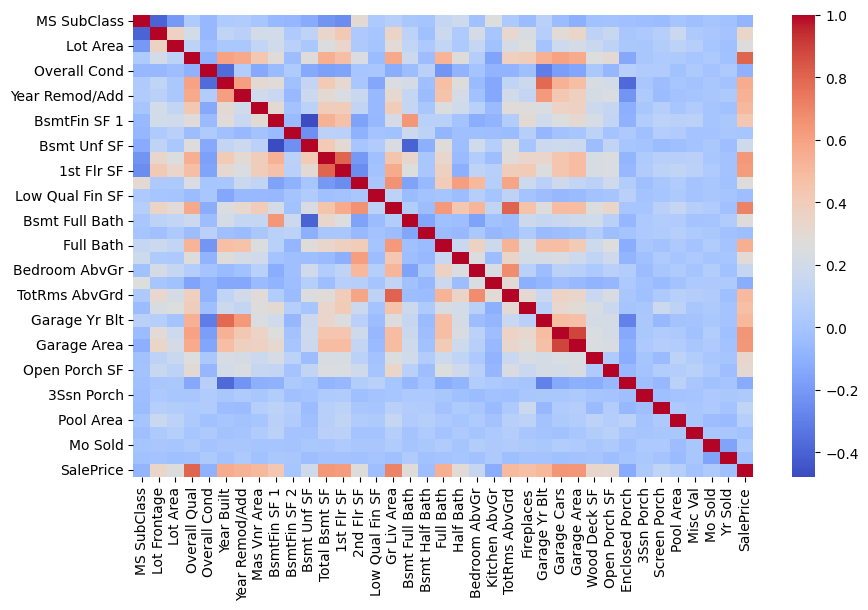

In [10]:
# TODO: Check correlations between numerical features and target variable (SalePrice).
# Use correlation heatmap or pairplot.
# Decide which features to keep/remove based on correlation.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric-only correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm")
plt.show()


## 🔹 Step 5: Encode Categorical Variables

In [11]:
# TODO: Identify categorical variables.
# Use methods like:
# - One-hot encoding
# - Ordinal encoding
# Decide what makes sense for each feature.

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

for col in col_cat:
    print(df[col].unique())

# df_oe = df.copy()  # keep a separate version
# ordinal_encoders = {}
# for col in col_cat:
#     oe = OrdinalEncoder()
#     df_oe[col] = oe.fit_transform(df_oe[col].values.reshape(-1, 1))
#     ordinal_encoders[col] = oe  # store encoder if needed later
# print(df_oe.head())

df_ohe = df.copy()  # keep a separate version
label_encoders = {}
ohe = OneHotEncoder(drop="first", sparse_output=False) # Set sparse_output to False
encoded = ohe.fit_transform(df[col_cat])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(col_cat), index=df.index)
df = pd.concat([df.drop(columns=col_cat), encoded_df], axis=1)

print(df.head())


['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
['Pave' 'Grvl']
['IR1' 'Reg' 'IR2' 'IR3']
['Lvl' 'HLS' 'Bnk' 'Low']
['AllPub' 'NoSewr' 'NoSeWa']
['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
['Gtl' 'Mod' 'Sev']
['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']
['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']
['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl' 'Membran' 'ClyTile' 'Roll'
 'Metal']
['BrkFace' 'VinylSd' 'Wd Sdng' 'CemntBd' 'HdBoard' 'Plywood' 'MetalSd'
 'AsbShng' 'WdShing' 'Stucco' 'AsphShn' 'BrkComm' 'CBlock' 'PreCast'
 

## 🔹 Step 6: Feature Scaling

In [12]:
# TODO: Try different scaling techniques:
# - StandardScaler
# - MinMaxScaler
# - RobustScaler
# Decide based on the distribution of features.

# print(df.head())
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# df_ss = df.copy()
# df_mm = df.copy()
# df_rs = df.copy()

# scaler = StandardScaler()
# df_ss[col_num] = scaler.fit_transform(df_ss[col_num])
# print(df_ss.head())

# col_num = df1.select_dtypes(exclude='object').columns
scaler = MinMaxScaler()
df[col_num] = scaler.fit_transform(df[col_num])
print(df.head())

# scaler = RobustScaler()
# df_rs[col_num] = scaler.fit_transform(df_rs[col_num])
# print(df_rs.head())


   MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0     0.000000      0.410959  0.142420      0.555556         0.500   
1     0.000000      0.202055  0.048246      0.444444         0.625   
2     0.000000      0.205479  0.060609      0.555556         0.625   
3     0.000000      0.246575  0.046087      0.666667         0.500   
4     0.235294      0.181507  0.058566      0.444444         0.500   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0    0.637681        0.166667        0.0700      0.113218      0.000000   
1    0.644928        0.183333        0.0000      0.082920      0.094364   
2    0.623188        0.133333        0.0675      0.163536      0.000000   
3    0.695652        0.300000        0.0000      0.188696      0.000000   
4    0.905797        0.800000        0.0000      0.140149      0.000000   

   Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0     0.188784       0.176759    0.277673    0.000000 

## 🔹 Step 7: Feature Selection & Feature Creation 💡

In [13]:
# TODO: Create at least 2 NEW features.
# Examples:
# - Age of house: df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
# - Interaction: df["Quality_x_Size"] = df["OverallQual"] * df["GrLivArea"]
# - Non-linear: df["Log_LotArea"] = np.log1p(df["LotArea"])

df["HouseRenew"] = df["Year Remod/Add"] - df["Year Built"]
df["Quality_x_Size"] = df["Overall Qual"] * df["Gr Liv Area"]
df["Log_LotArea"] = np.log1p(df["Lot Area"])

print(df.columns)


Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2',
       ...
       'Sale Type_VWD', 'Sale Type_WD ', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial', 'HouseRenew',
       'Quality_x_Size', 'Log_LotArea'],
      dtype='object', length=250)


## 🔹 Step 8: Outlier Handling

In [14]:
# TODO: Detect and handle outliers.
# Methods:
# - IQR rule
# - Z-score
# - Visualization (boxplots, scatterplots)

z_scores = np.abs((df[col_num] - df[col_num].mean()) / df[col_num].std())
outliers = (z_scores > 3).any(axis=1)
print(df[~outliers].shape)

Q1 = df[col_num].quantile(0.25)
Q3 = df[col_num].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[col_num] < (Q1 - 1.5 * IQR)) | (df[col_num] > (Q3 + 1.5 * IQR))).any(axis=1)
print(df[outliers].shape)
print(df[~outliers].shape)

df = df[~outliers]
print(df.shape)

(2051, 250)
(1846, 250)
(1084, 250)
(1084, 250)


## 🔹 Step 9: Skewness Handling

MS SubClass
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.886349 -0.013707  1.504796e-31
1                 Log1p  0.637040 -0.551829  1.237427e-19
2                  Sqrt  0.054876 -1.504534  4.793558e-23
3       Box-Cox λ=0.075 -0.305718 -1.871246  9.786283e-39
4  Yeo–Johnson λ=-2.499  0.170848 -1.395905  5.544180e-21


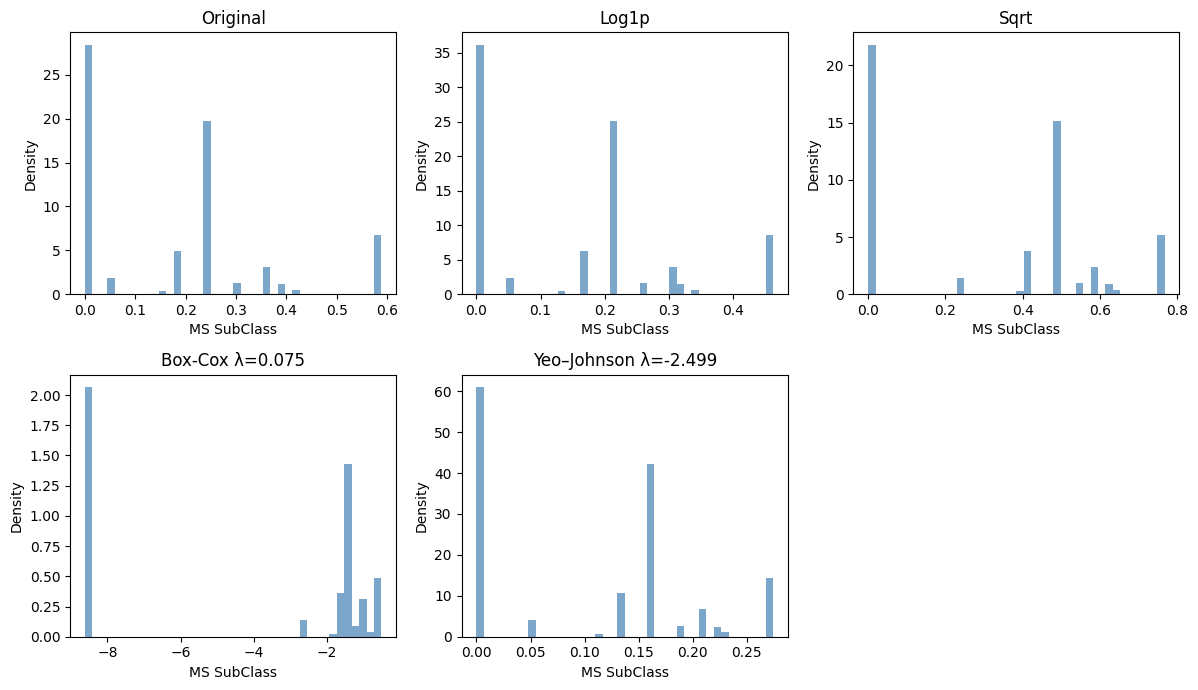

No need to skewness
Lot Frontage
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.164109  0.435822  1.203745e-03
1                Log1p -0.300100  0.491827  1.242747e-06
2                 Sqrt -0.736394  1.091410  1.104070e-33
3      Box-Cox λ=1.175  0.020738  0.384830  3.393478e-02
4  Yeo–Johnson λ=2.291  0.011579  0.423758  1.712140e-02


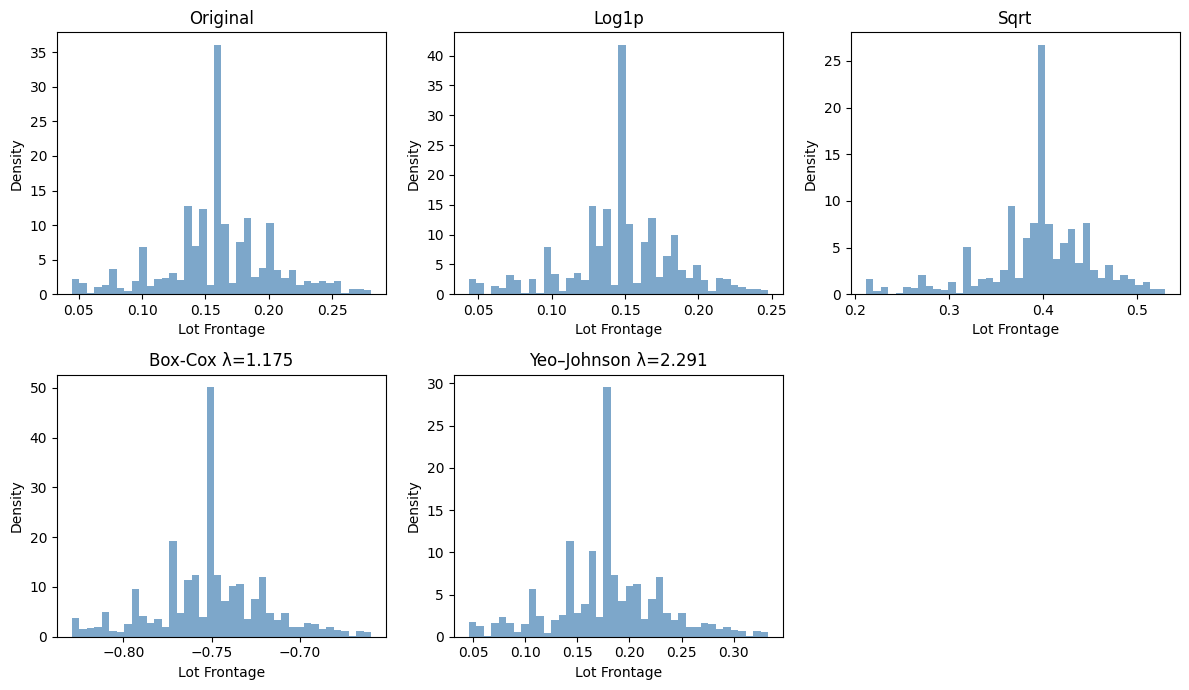

No need to skewness
Lot Area
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.193318  0.491558  1.458799e-04
1                 Log1p  0.148704  0.458555  1.175331e-03
2                  Sqrt -0.503415  0.730164  6.742263e-16
3       Box-Cox λ=0.874  0.025518  0.446418  1.046792e-02
4  Yeo–Johnson λ=-3.504 -0.005552  0.381210  3.745513e-02


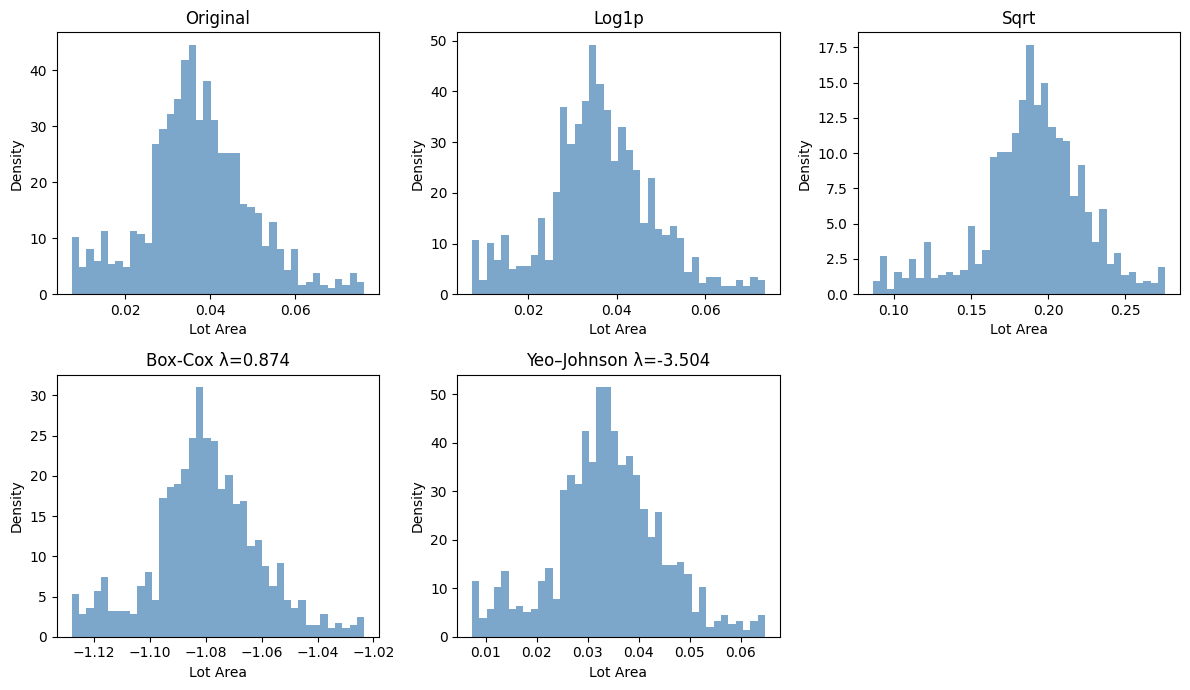

No need to skewness
Overall Qual
             Transform  Skewness  Kurtosis      JB-p
0             Original -0.041368 -0.626607  0.000121
1                Log1p -0.225678 -0.518858  0.000023
2                 Sqrt -0.315054 -0.371808  0.000006
3      Box-Cox λ=0.981 -0.051116 -0.622330  0.000126
4  Yeo–Johnson λ=1.115 -0.020577 -0.631373  0.000118


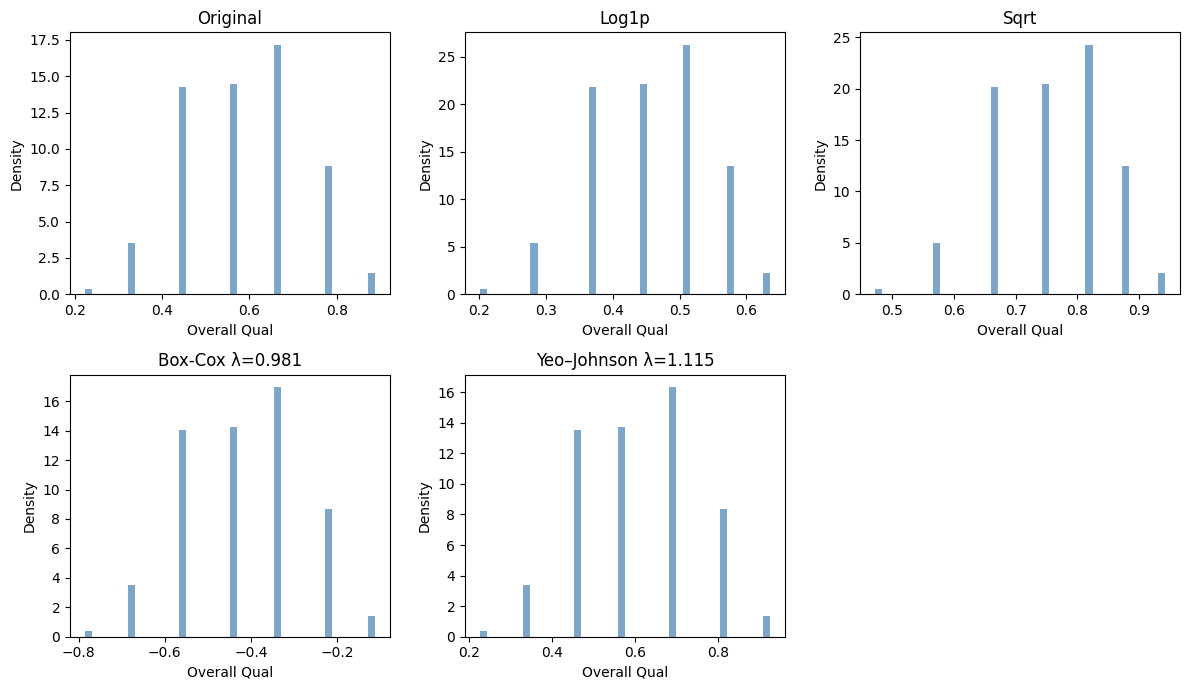

No need to skewness
Overall Cond
              Transform  Skewness  Kurtosis          JB-p
0              Original  1.315890  0.667405  5.008987e-73
1                 Log1p  1.234379  0.560111  1.401963e-63
2                  Sqrt  1.199503  0.539343  5.021128e-60
3      Box-Cox λ=-2.344 -0.149502  3.012413  1.320834e-90
4  Yeo–Johnson λ=-8.828 -0.118200  2.786273  2.044973e-77


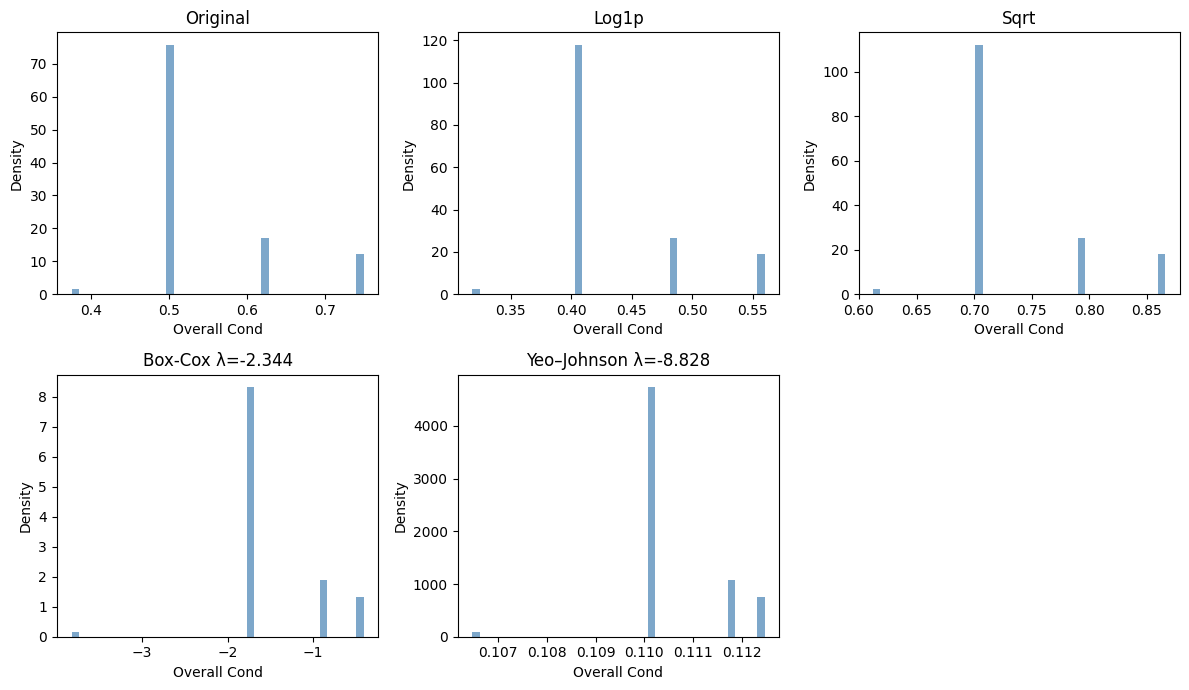

No need to skewness
Year Built
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.984449  0.007311  9.524967e-39
1                Log1p -1.179310  0.742862  1.061442e-60
2                 Sqrt -1.273533  1.229468  3.515338e-79
3      Box-Cox λ=2.968 -0.448363 -1.353507  1.398393e-26
4  Yeo–Johnson λ=6.632 -0.387527 -1.418956  2.295898e-26


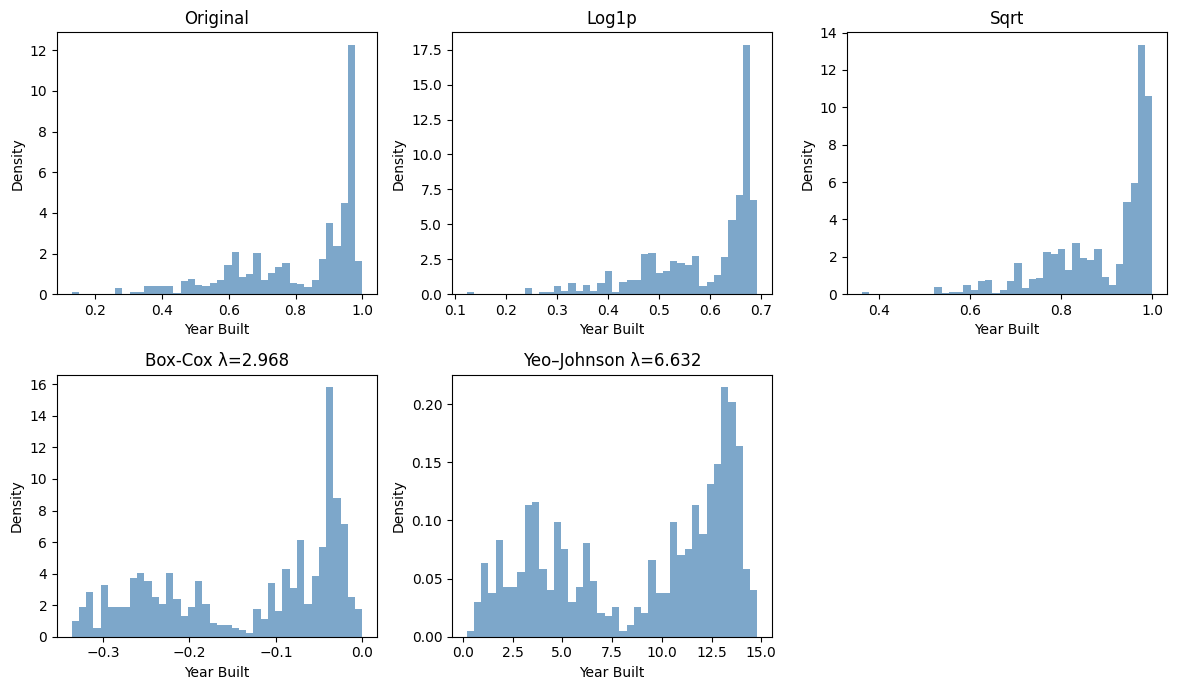

No need to skewness
Year Remod/Add
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.883418 -0.752479  6.751235e-37
1                Log1p -1.048502 -0.383627  2.675912e-45
2                 Sqrt -1.444760  0.931803  3.941073e-91
3      Box-Cox λ=0.558 -1.337485  0.555913  6.158434e-74
4  Yeo–Johnson λ=3.858 -0.499636 -1.331199  6.700992e-28


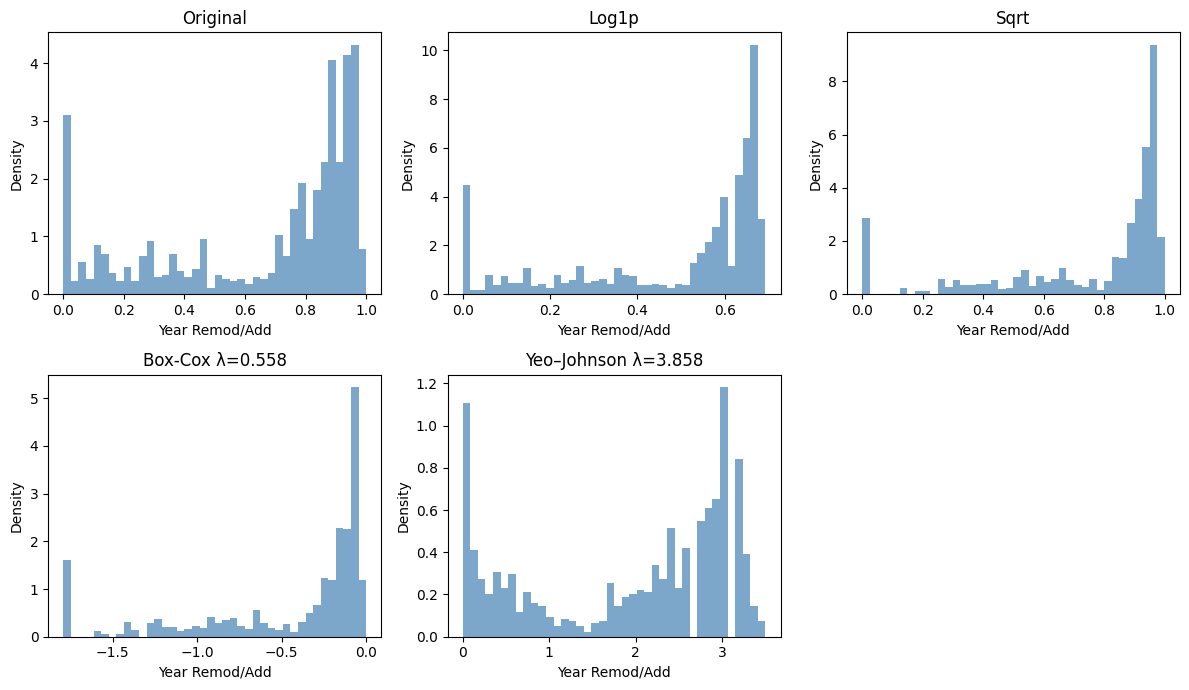

No need to skewness
Mas Vnr Area
               Transform  Skewness  Kurtosis          JB-p
0               Original  1.246372  0.368818  5.276675e-63
1                  Log1p  1.177910  0.125587  2.588339e-55
2                   Sqrt  0.688912 -1.175103  6.879950e-33
3       Box-Cox λ=-0.084  0.315624 -1.888920  1.251314e-39
4  Yeo–Johnson λ=-16.227  0.608547 -1.439779  1.381142e-35


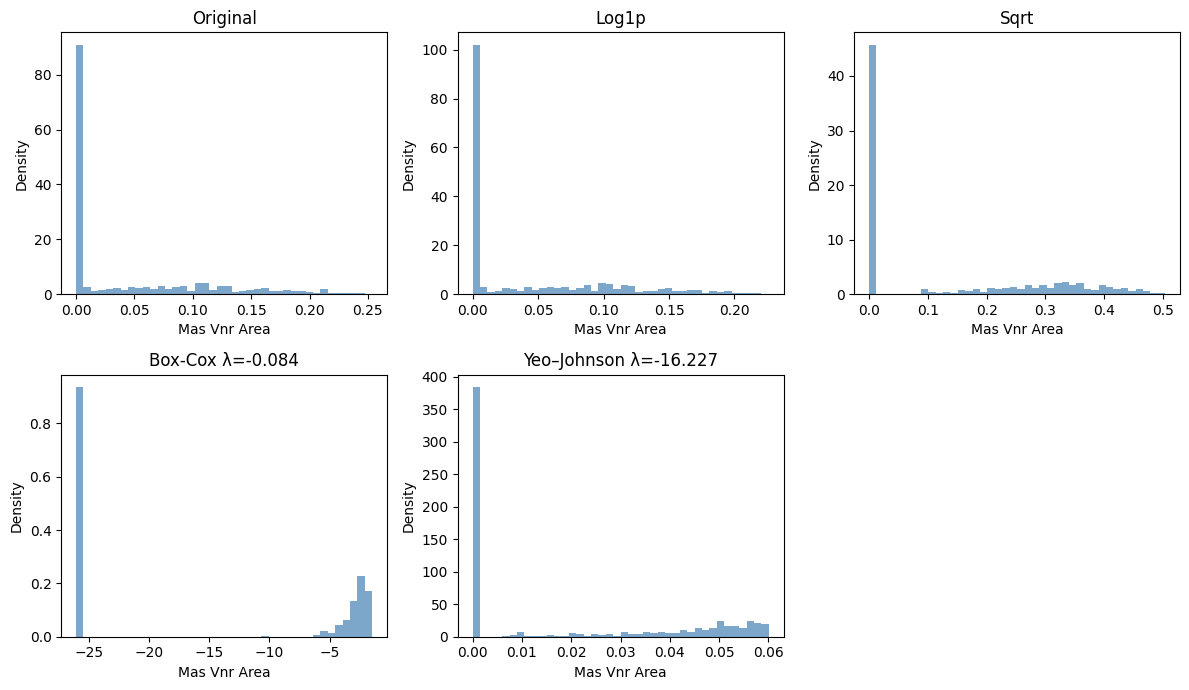

No need to skewness
BsmtFin SF 1
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.427973 -0.924887  2.658369e-16
1                 Log1p  0.345378 -1.087329  5.304488e-17
2                  Sqrt -0.173369 -1.576481  2.789634e-26
3       Box-Cox λ=0.159 -0.557835 -1.535081  4.788046e-36
4  Yeo–Johnson λ=-3.521  0.110621 -1.448212  8.908563e-22


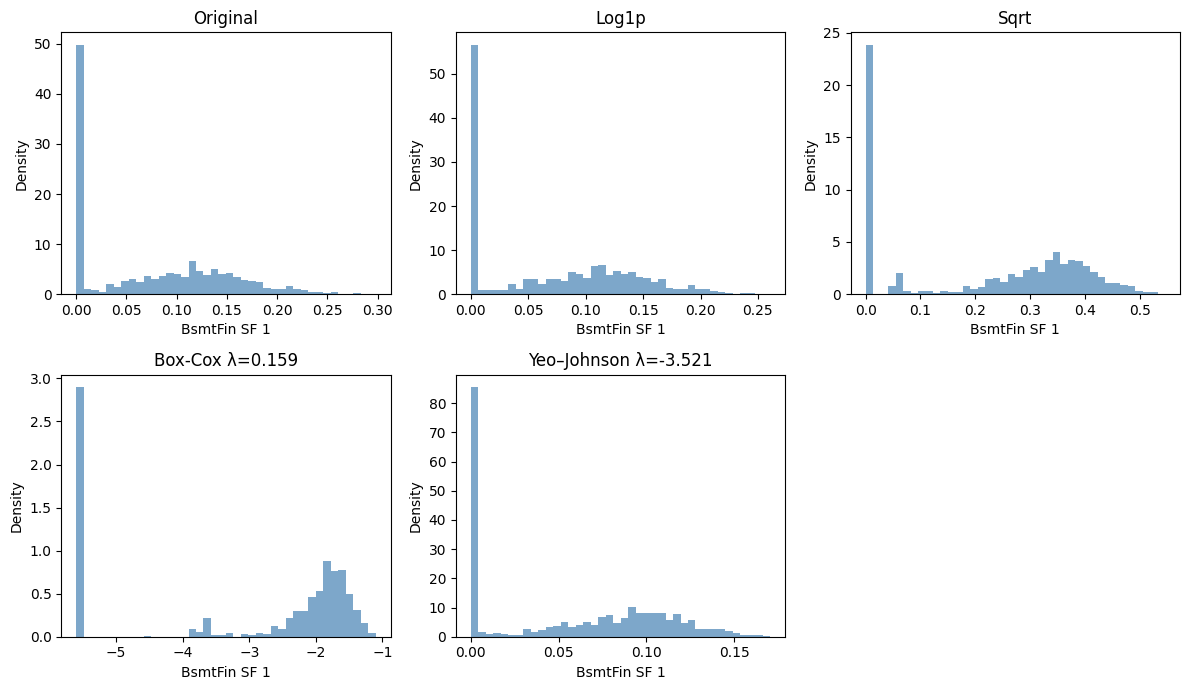

No need to skewness
BsmtFin SF 2
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Bsmt Unf SF
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.625519 -0.508066  1.312548e-18
1                 Log1p  0.404943 -0.766226  6.437478e-13
2                  Sqrt -0.194340 -0.312149  3.653141e-03
3       Box-Cox λ=0.469 -0.286105 -0.144394  3.838770e-04
4  Yeo–Johnson λ=-1.560  0.068859 -0.939326  1.446187e-09


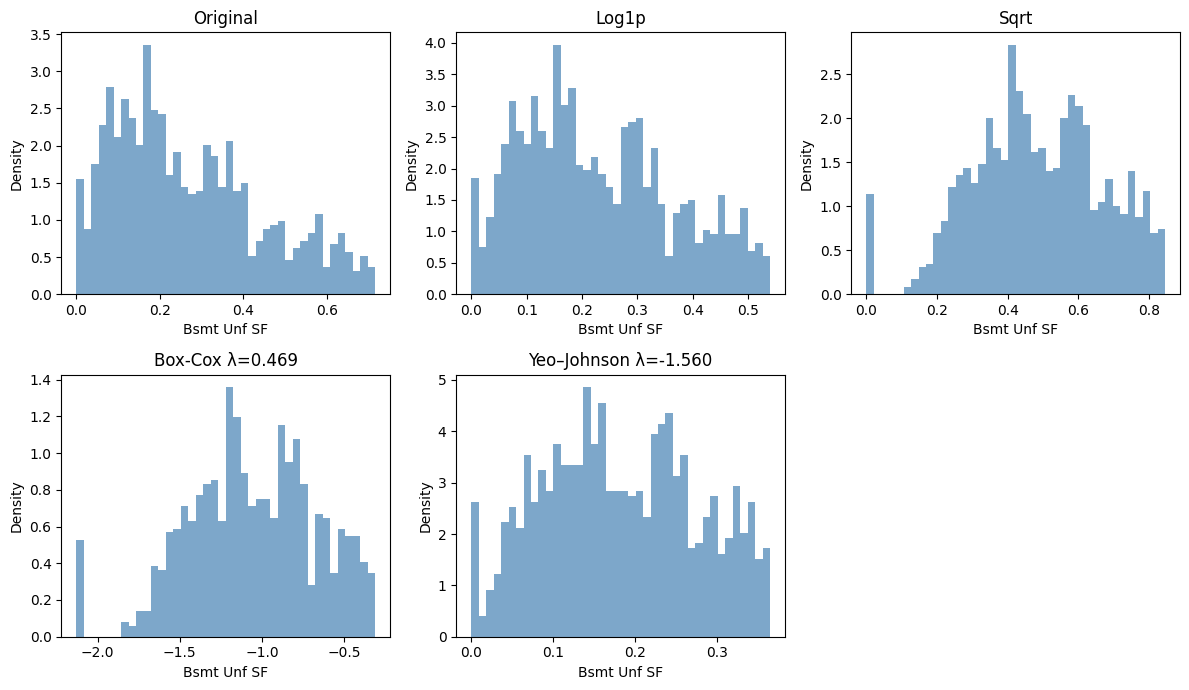

No need to skewness
Total Bsmt SF
              Transform  Skewness  Kurtosis      JB-p
0              Original  0.235075 -0.264327  0.001402
1                 Log1p  0.125004 -0.241257  0.065479
2                  Sqrt -0.228389  0.245399  0.002307
3       Box-Cox λ=0.730  0.002251 -0.096941  0.808409
4  Yeo–Johnson λ=-1.070  0.002995 -0.170016  0.520173


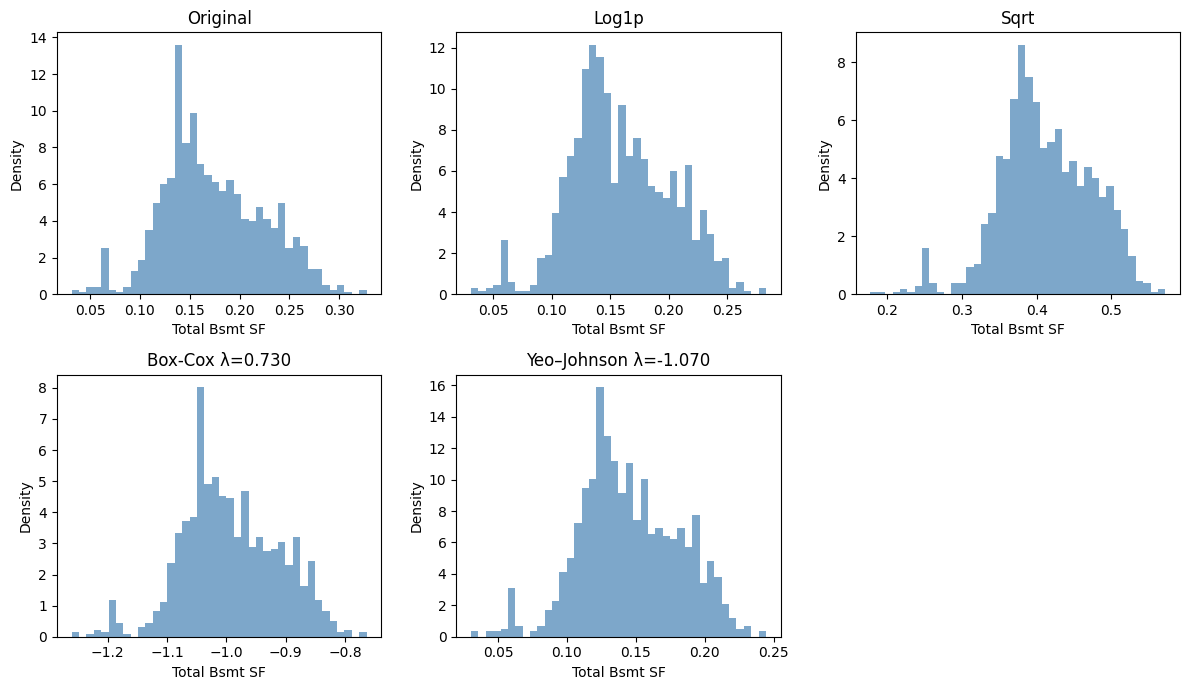

No need to skewness
1st Flr SF
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.506196 -0.539185  1.248151e-13
1                 Log1p  0.413799 -0.658863  1.058932e-11
2                  Sqrt  0.167969 -0.732494  4.273412e-07
3       Box-Cox λ=0.252 -0.019610 -0.642286  8.687160e-05
4  Yeo–Johnson λ=-3.964  0.060979 -0.843186  7.605624e-08


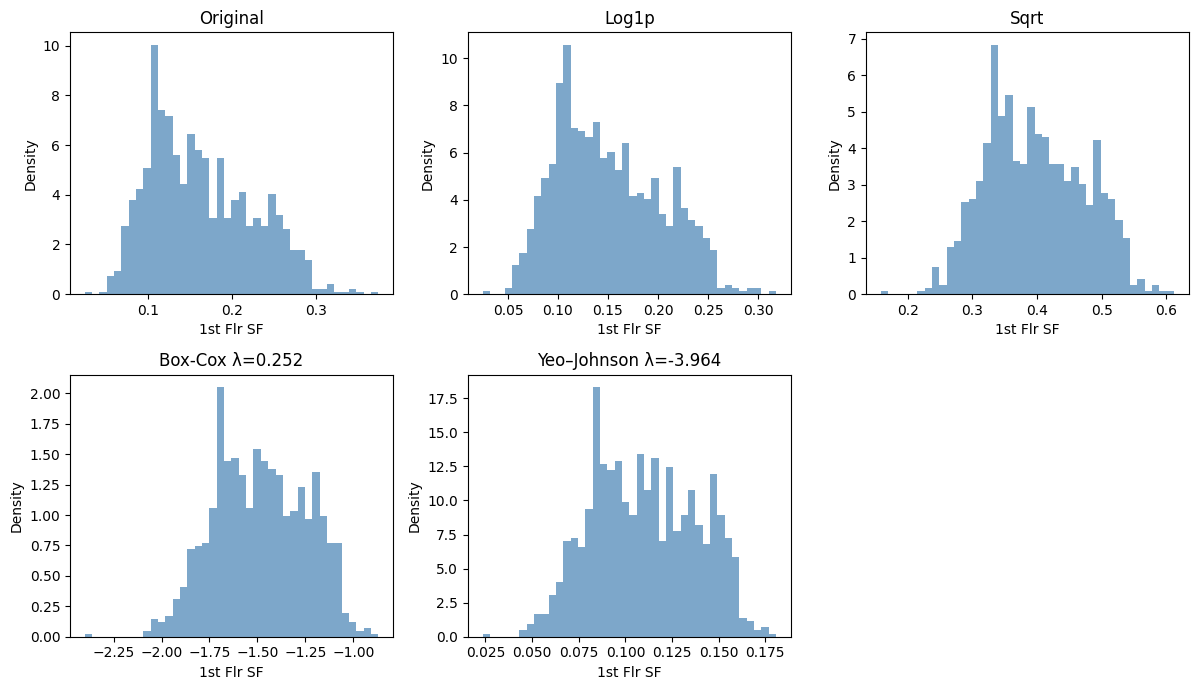

No need to skewness
2nd Flr SF
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.731936 -1.044630  1.904799e-32
1                 Log1p  0.646686 -1.280826  3.187818e-33
2                  Sqrt  0.492646 -1.637604  1.501389e-36
3      Box-Cox λ=-0.093  0.395762 -1.842275  3.696521e-40
4  Yeo–Johnson λ=-4.331  0.463803 -1.710962  7.071556e-38


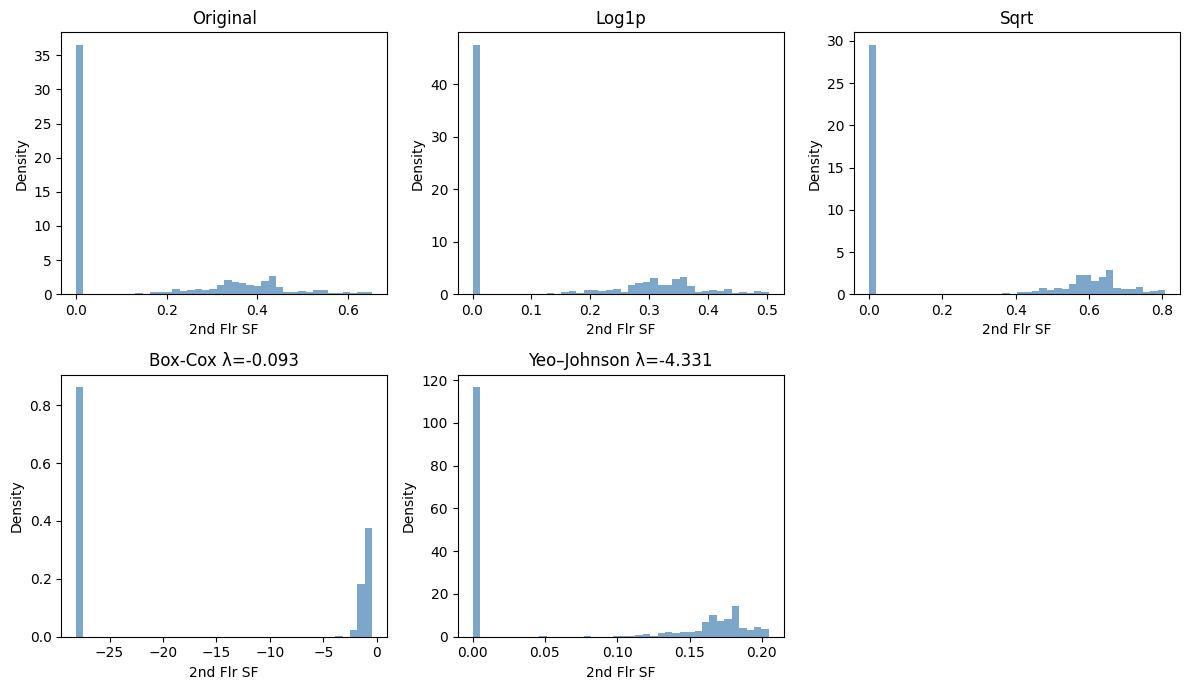

No need to skewness
Low Qual Fin SF
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Gr Liv Area
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.442162 -0.045347  2.040961e-08
1                 Log1p  0.293152 -0.257306  9.532551e-05
2                  Sqrt  0.018849 -0.422838  1.708059e-02
3       Box-Cox λ=0.446 -0.026264 -0.436018  1.283401e-02
4  Yeo–Johnson λ=-1.978  0.018648 -0.505353  3.031253e-03


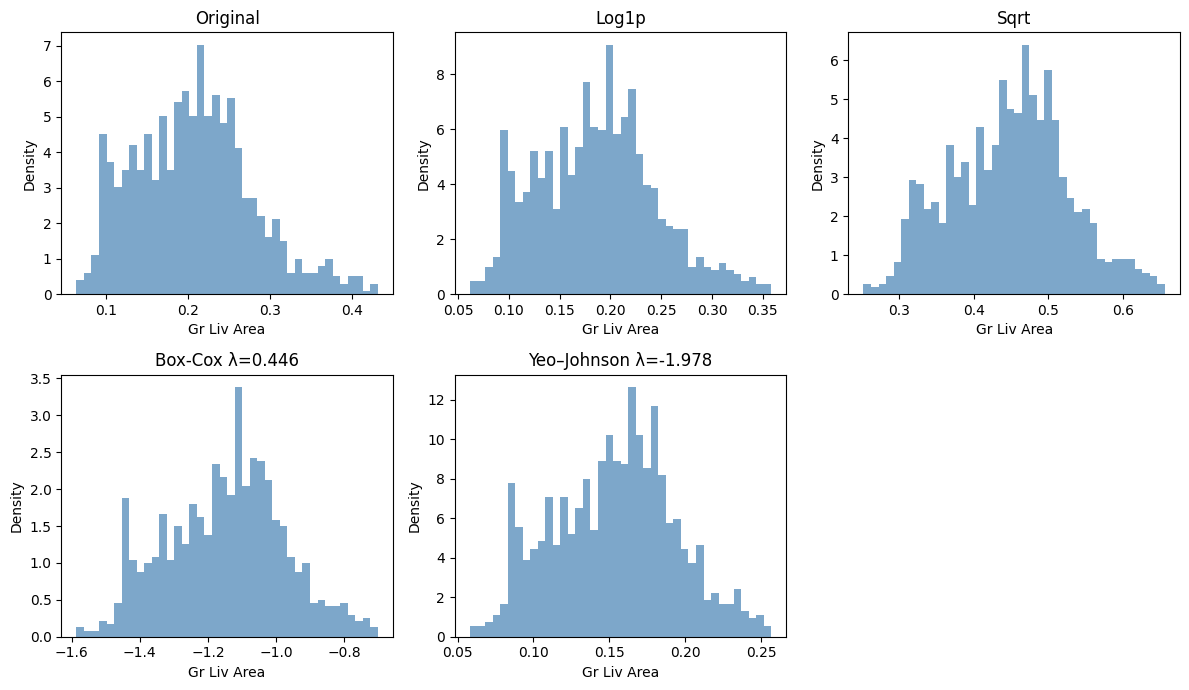

No need to skewness
Bsmt Full Bath
              Transform  Skewness  Kurtosis          JB-p
0              Original   0.34834 -1.878659  4.210428e-40
1                 Log1p   0.34834 -1.878659  4.210428e-40
2                  Sqrt   0.34834 -1.878659  4.210428e-40
3      Box-Cox λ=-0.082   0.34834 -1.878659  4.210428e-40
4  Yeo–Johnson λ=-3.644   0.34834 -1.878659  4.210428e-40


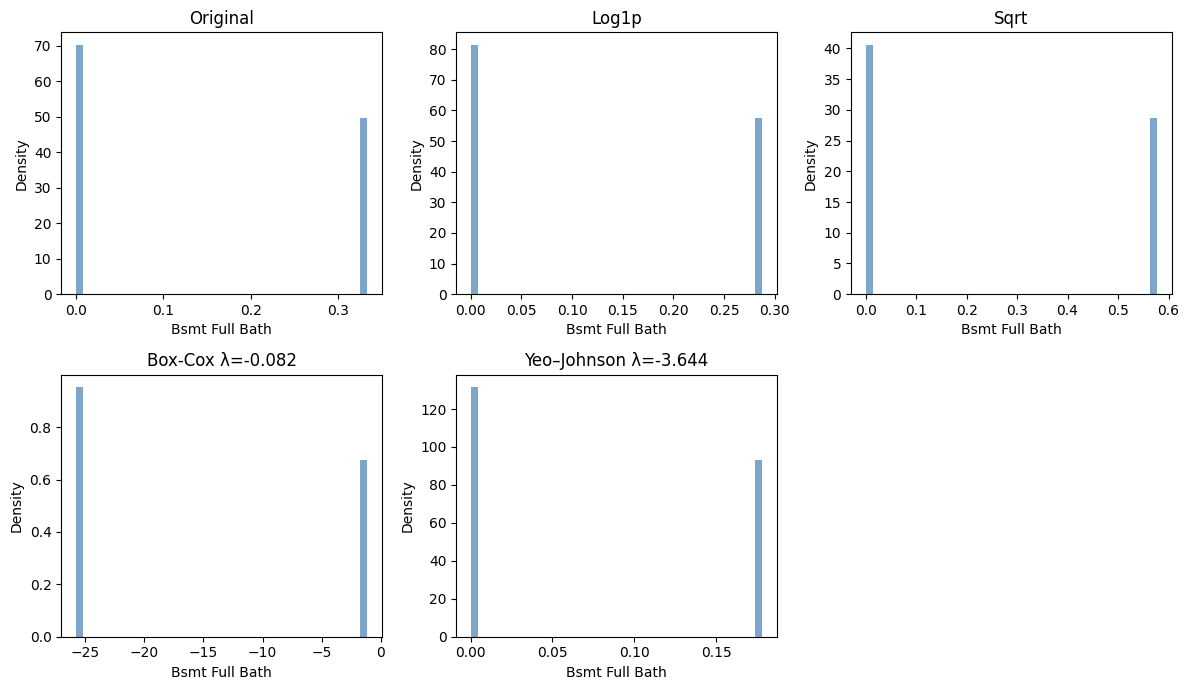

No need to skewness
Bsmt Half Bath
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Full Bath
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.289148 -1.433131  3.767711e-24
1                Log1p -0.339970 -1.578263  1.084539e-29
2                 Sqrt -0.361590 -1.633640  4.962668e-32
3      Box-Cox λ=1.266 -0.229861 -1.241924  6.307108e-18
4  Yeo–Johnson λ=3.010 -0.106955 -0.786353  3.065813e-07


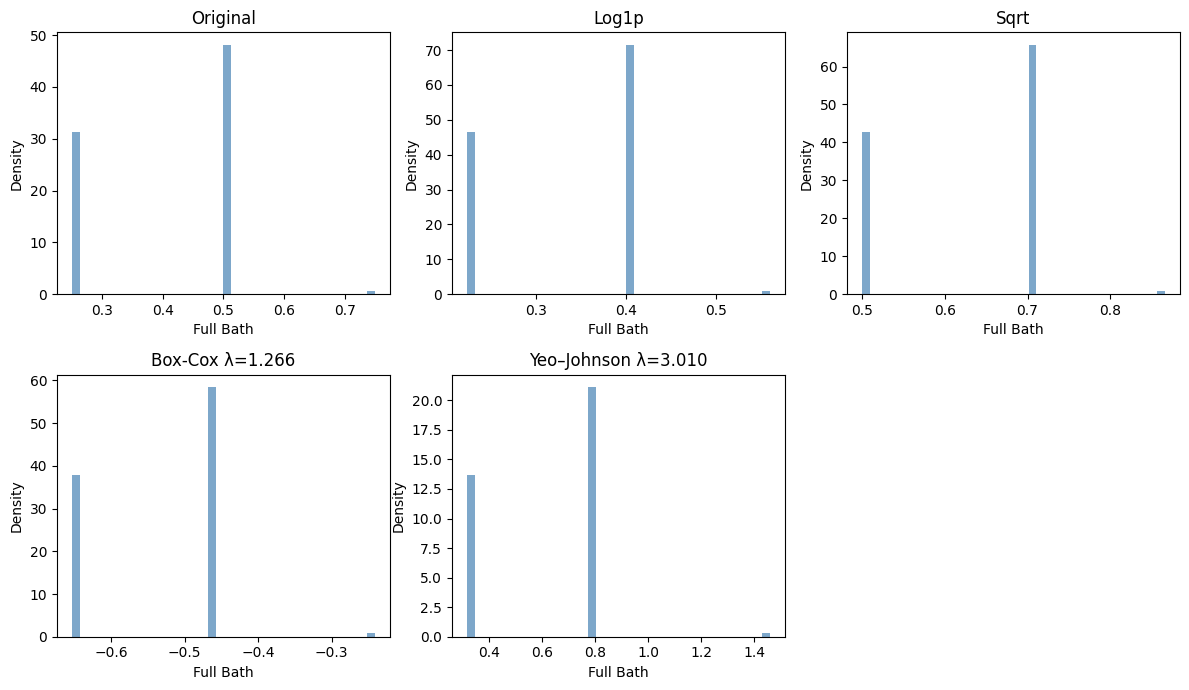

No need to skewness
Half Bath
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.453704 -1.731194  3.388560e-38
1                 Log1p  0.442944 -1.780418  1.633736e-39
2                  Sqrt  0.436822 -1.803689  4.040524e-40
3      Box-Cox λ=-0.100  0.434249 -1.811418  2.632328e-40
4  Yeo–Johnson λ=-3.228  0.434922 -1.809636  2.888586e-40


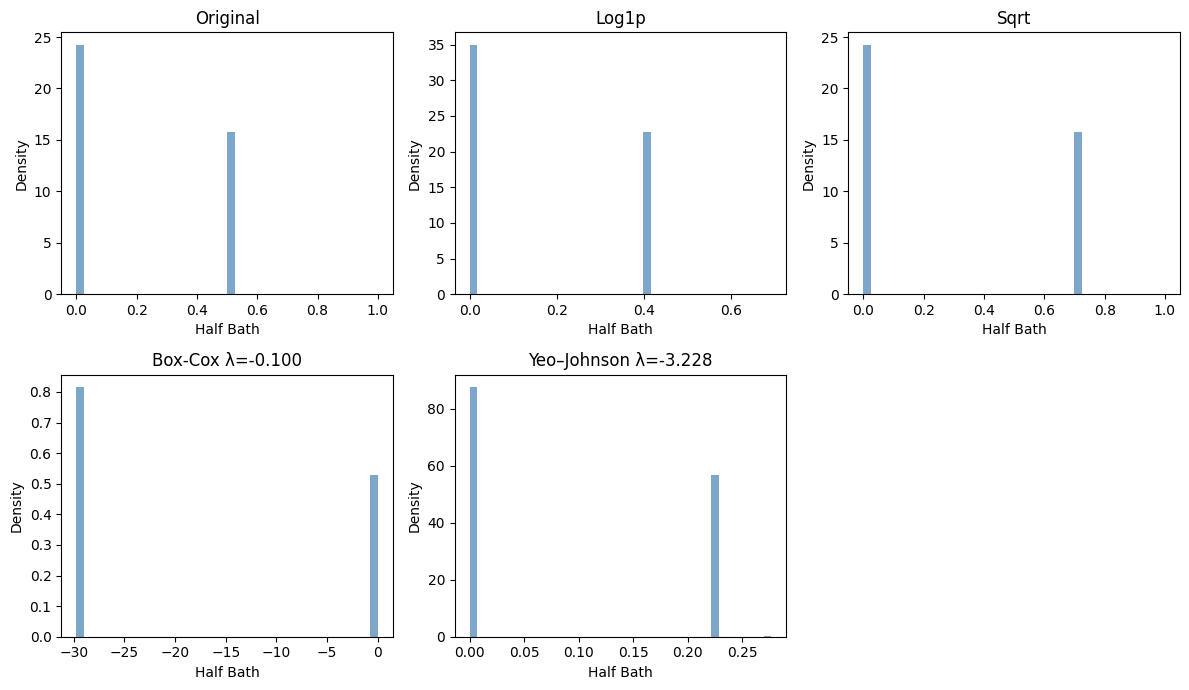

No need to skewness
Bedroom AbvGr
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.574971  0.765110  1.945571e-19
1                Log1p -0.799725  1.065963  5.818817e-37
2                 Sqrt -1.085243  1.756455  3.442481e-77
3      Box-Cox λ=1.637  0.006869  0.441735  1.214362e-02
4  Yeo–Johnson λ=3.698  0.029656  0.526282  1.774194e-03


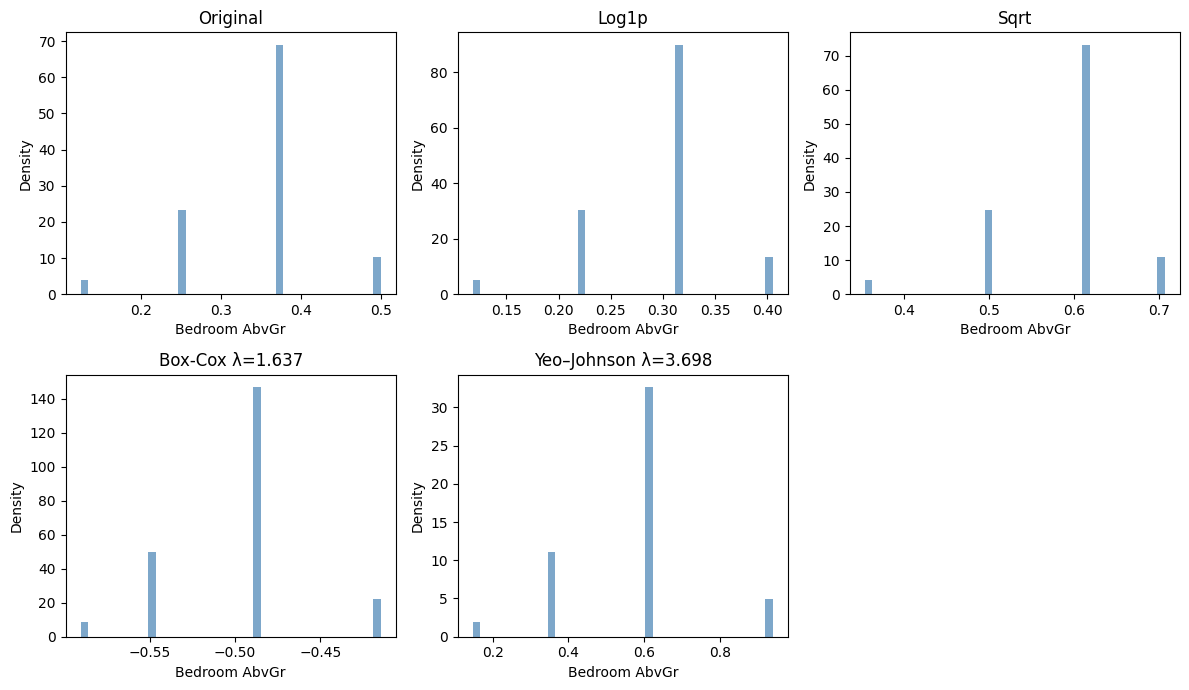

No need to skewness
Kitchen AbvGr
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
TotRms AbvGrd
             Transform  Skewness  Kurtosis      JB-p
0             Original  0.182316  0.097557  0.040053
1                Log1p -0.039127  0.050774  0.821591
2                 Sqrt -0.329619  0.413221  0.000001
3      Box-Cox λ=0.819  0.007378  0.102827  0.783723
4  Yeo–Johnson λ=0.178  0.000203  0.047712  0.949886


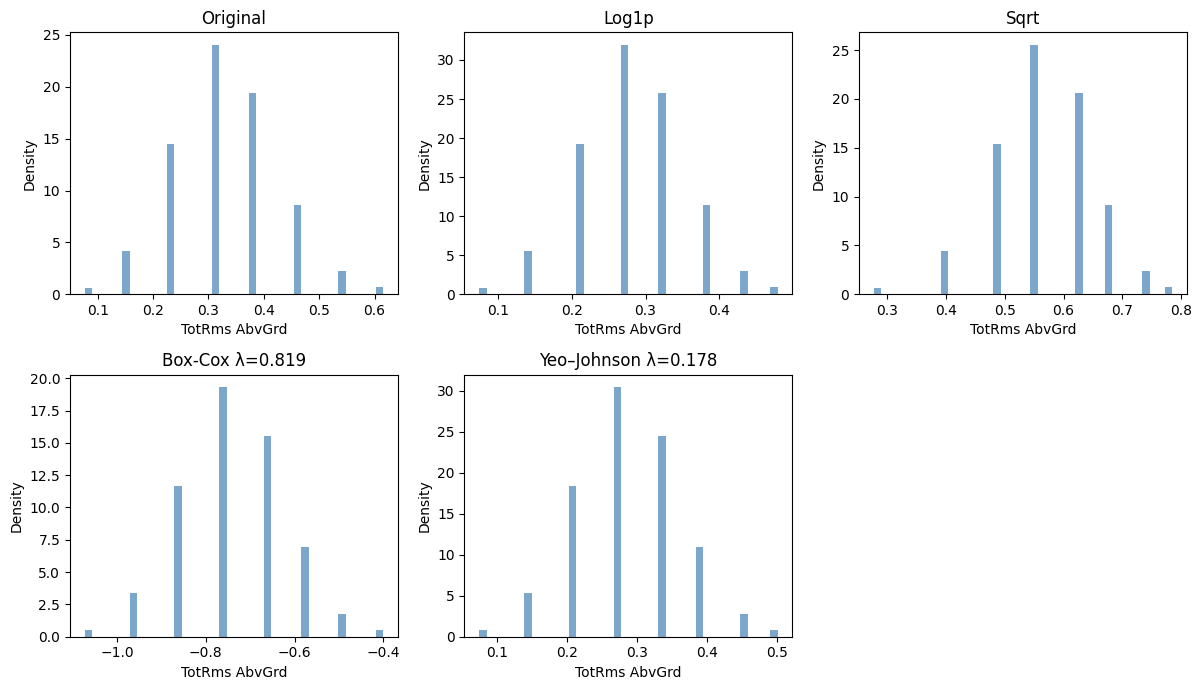

No need to skewness
Fireplaces
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.435838 -0.802447  1.707575e-14
1                 Log1p  0.290574 -1.257020  1.549745e-19
2                  Sqrt  0.064598 -1.854071  1.321709e-34
3       Box-Cox λ=0.002 -0.009785 -1.998082  6.921493e-40
4  Yeo–Johnson λ=-1.883  0.127857 -1.704695  7.199572e-30


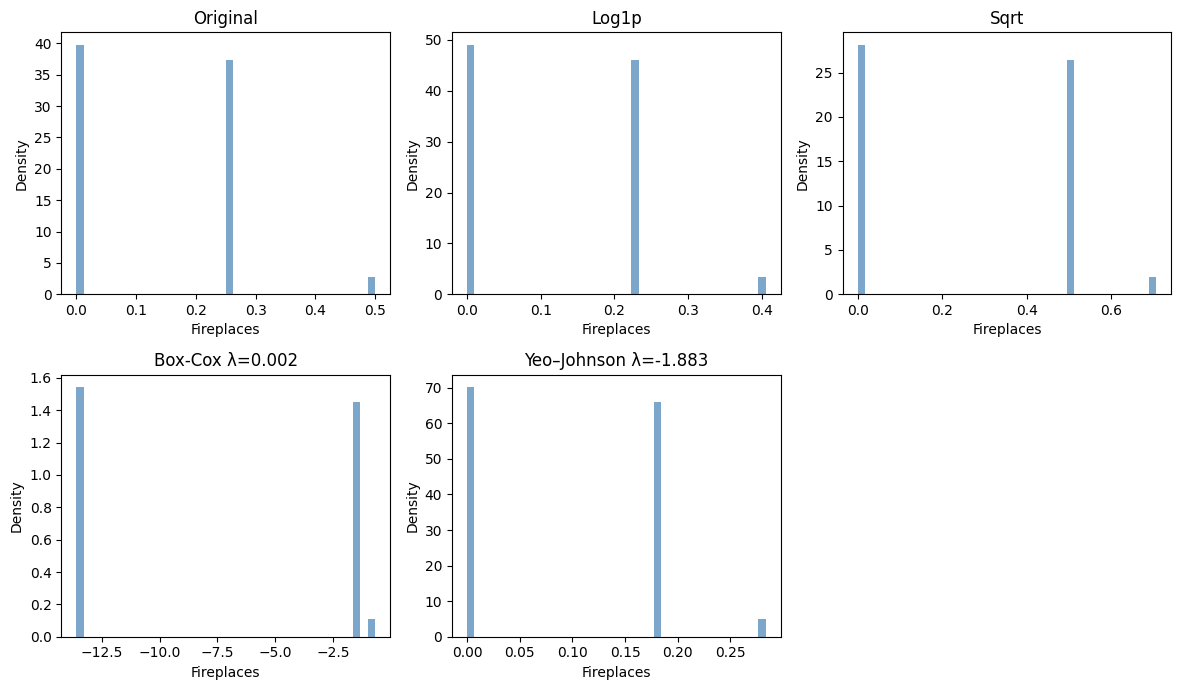

No need to skewness
Garage Yr Blt
              Transform  Skewness  Kurtosis          JB-p
0              Original -1.010552  0.120907  6.209873e-41
1                 Log1p -1.110561  0.473144  2.622238e-51
2                  Sqrt -1.350694  1.541369  1.336201e-95
3       Box-Cox λ=2.735 -0.449301 -1.291138  5.374414e-25
4  Yeo–Johnson λ=11.890 -0.352191 -1.381607  2.584039e-24


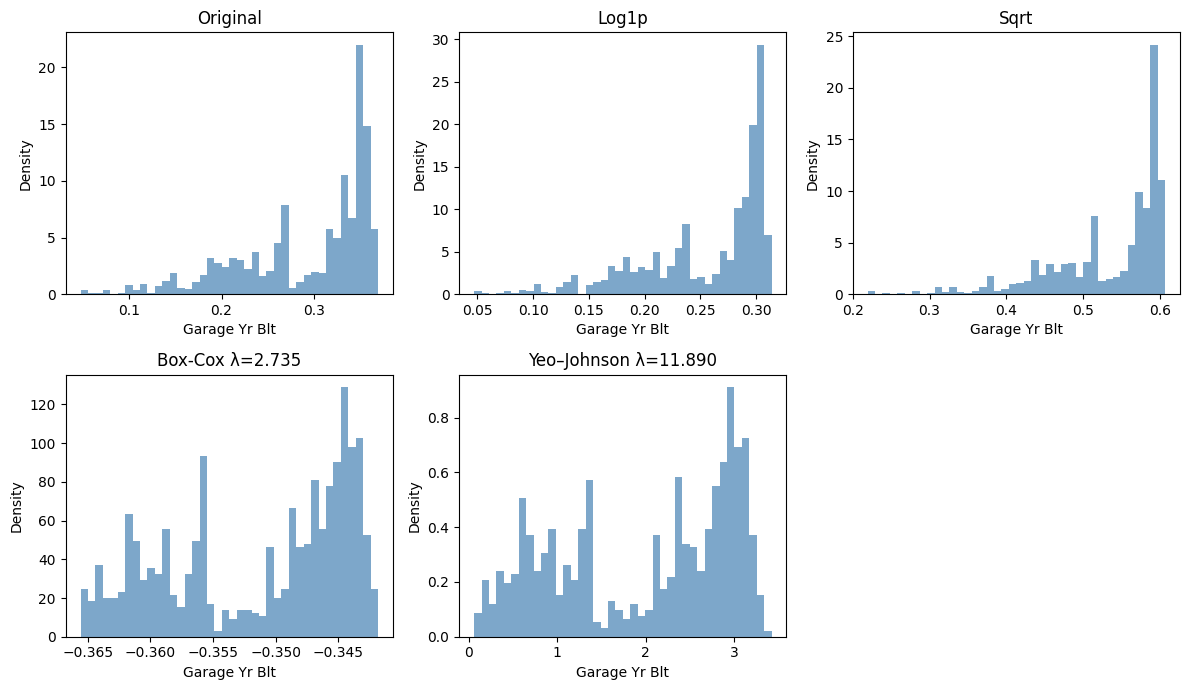

No need to skewness
Garage Cars
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.512396  0.651562  3.436412e-15
1                Log1p -0.879854  1.231952  5.546512e-46
2                 Sqrt -2.151016  6.364916  0.000000e+00
3      Box-Cox λ=0.791 -0.999547  1.774545  8.305793e-71
4  Yeo–Johnson λ=2.516  0.020714  0.347018  6.340089e-02


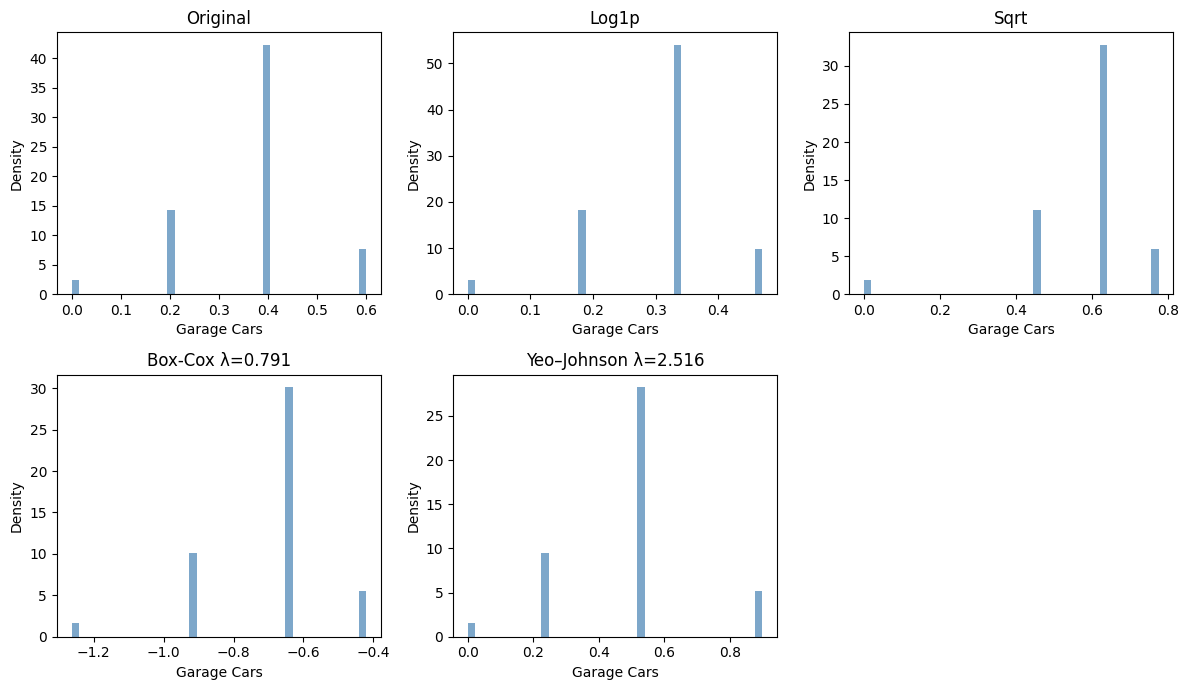

No need to skewness
Garage Area
             Transform  Skewness  Kurtosis          JB-p
0             Original -0.163091  0.566811  6.389845e-05
1                Log1p -0.534796  1.027138  2.705351e-22
2                 Sqrt -1.978065  6.143988  0.000000e+00
3      Box-Cox λ=0.750 -0.832406  1.946648  4.472323e-65
4  Yeo–Johnson λ=1.528  0.022521  0.455883  8.744728e-03


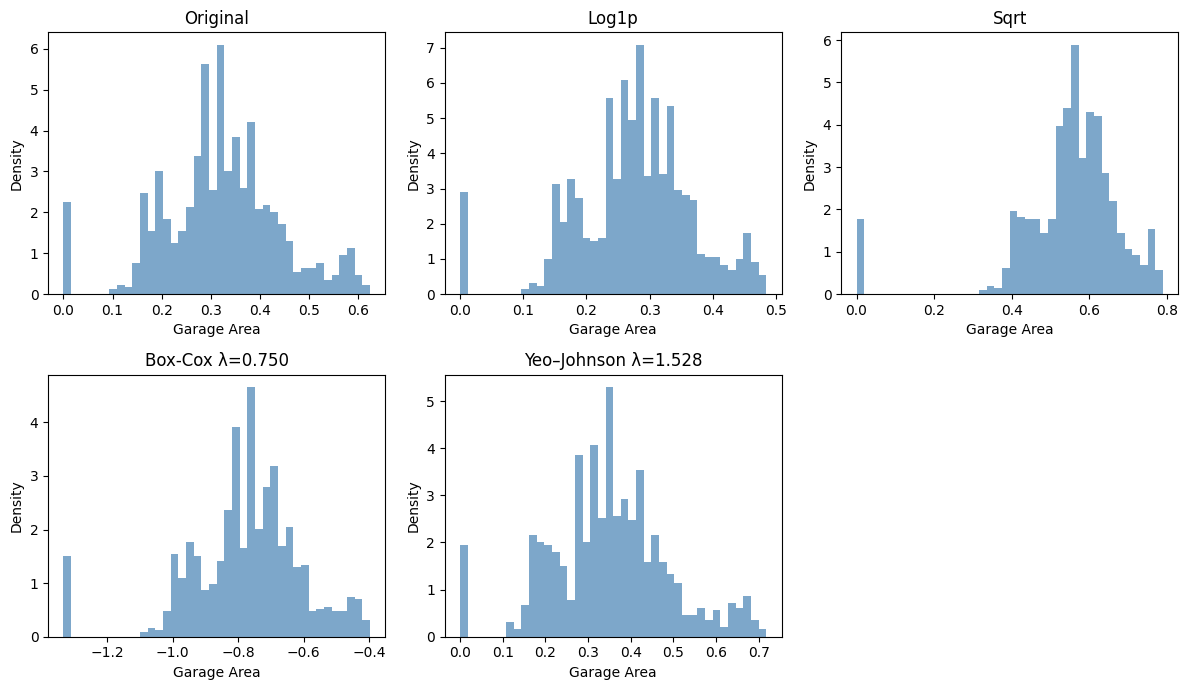

No need to skewness
Wood Deck SF
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.688713 -0.438455  3.207166e-21
1                 Log1p  0.592142 -0.708681  2.081936e-19
2                  Sqrt  0.084302 -1.672121  1.989009e-28
3       Box-Cox λ=0.044 -0.167532 -1.950416  3.879424e-39
4  Yeo–Johnson λ=-6.104  0.203248 -1.557520  3.862620e-26


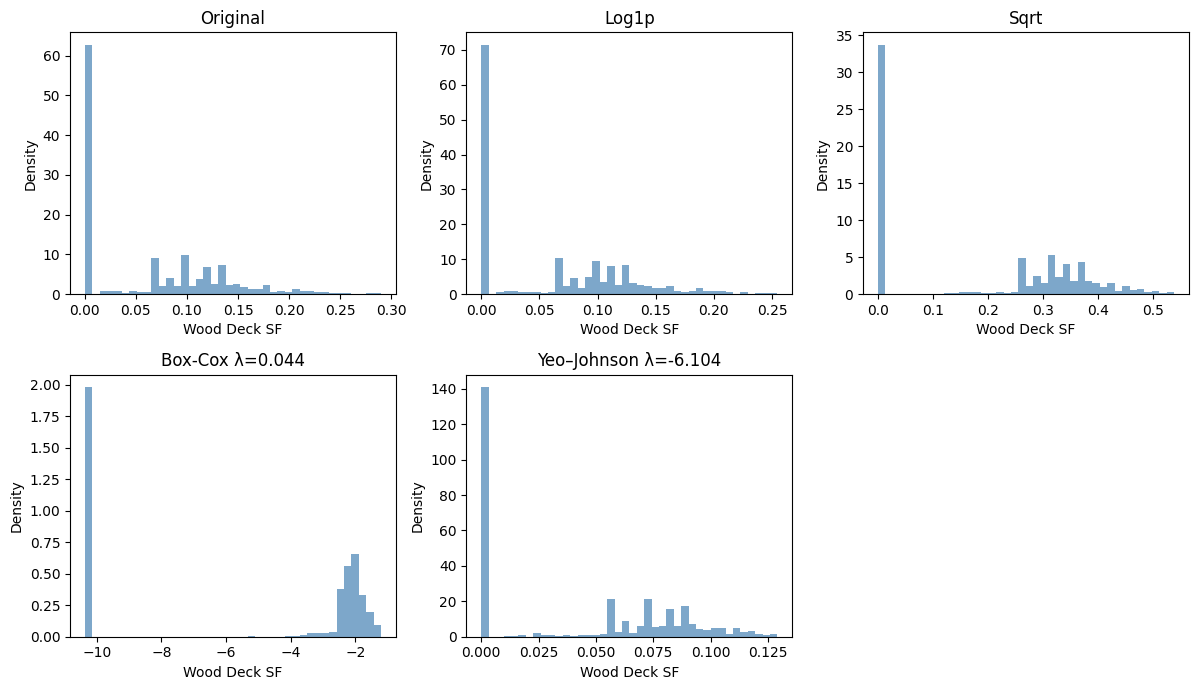

No need to skewness
Open Porch SF
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.949868  0.097338  3.241214e-36
1                 Log1p  0.854338 -0.144106  1.451070e-29
2                  Sqrt  0.020874 -1.341071  2.207069e-18
3       Box-Cox λ=0.137 -0.487453 -1.644769  1.397957e-36
4  Yeo–Johnson λ=-8.705  0.213113 -1.284912  1.060597e-18


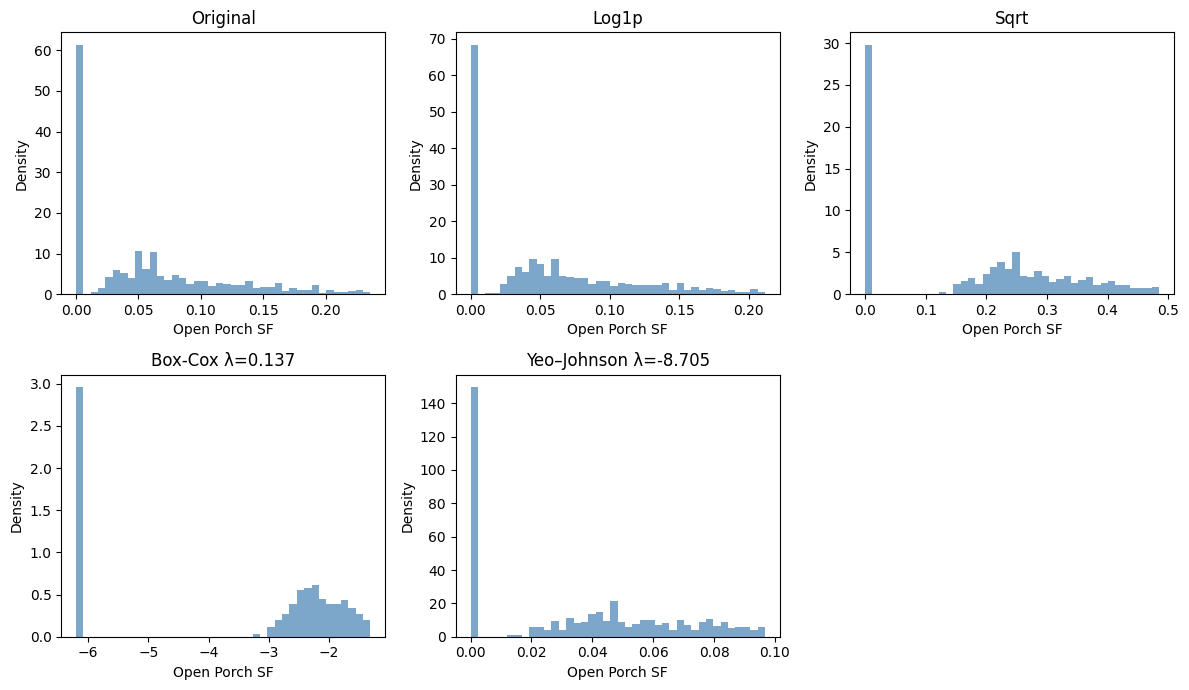

No need to skewness
Enclosed Porch
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
3Ssn Porch
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Screen Porch
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Pool Area
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Misc Val
  Column is constant, skipping transformations.
  Transform  Skewness  Kurtosis  JB-p
0  Original       NaN       NaN   NaN
No need to skewness
Mo Sold
             Transform  Skewness  Kurtosis          JB-p
0             Original  0.204072 -0.412265  5.003022e-04
1                Log1p -0.185784 -0.394476  1.317363e-03
2                 Sqrt 

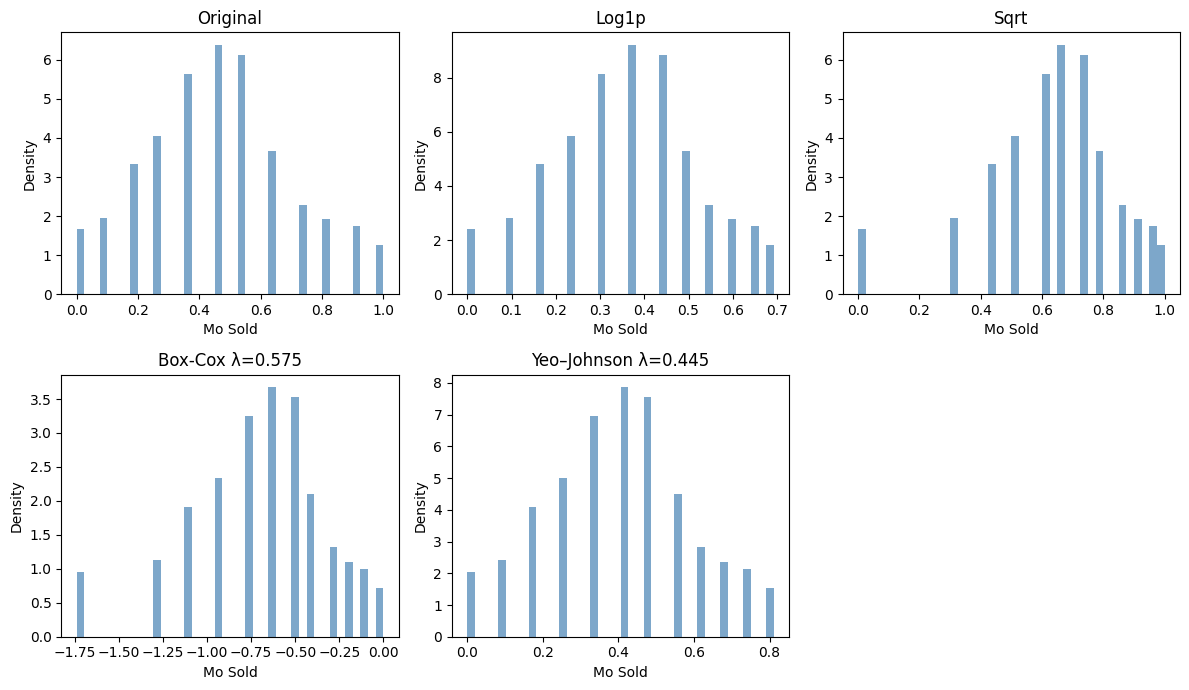

No need to skewness
Yr Sold
             Transform  Skewness  Kurtosis          JB-p
0             Original  0.136403 -1.141585  3.078675e-14
1                Log1p -0.141117 -1.191619  1.959227e-15
2                 Sqrt -0.674857 -0.816704  3.899153e-25
3      Box-Cox λ=0.290 -1.078679 -0.413921  4.700840e-48
4  Yeo–Johnson λ=0.385 -0.035400 -1.190230  1.139261e-14


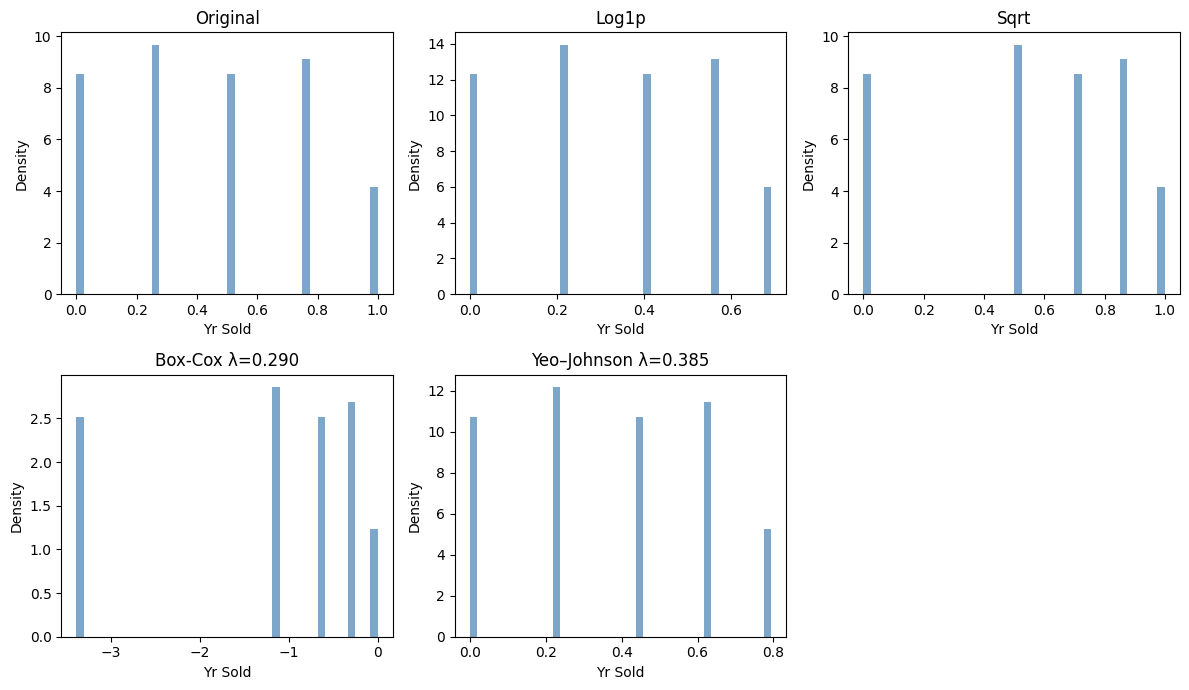

No need to skewness
SalePrice
              Transform  Skewness  Kurtosis          JB-p
0              Original  0.541625 -0.010833  3.090809e-12
1                 Log1p  0.391721 -0.171965  4.898900e-07
2                  Sqrt  0.106102 -0.147317  2.215622e-01
3       Box-Cox λ=0.391  0.000090 -0.073750  8.844107e-01
4  Yeo–Johnson λ=-2.518  0.016774 -0.288097  1.495931e-01


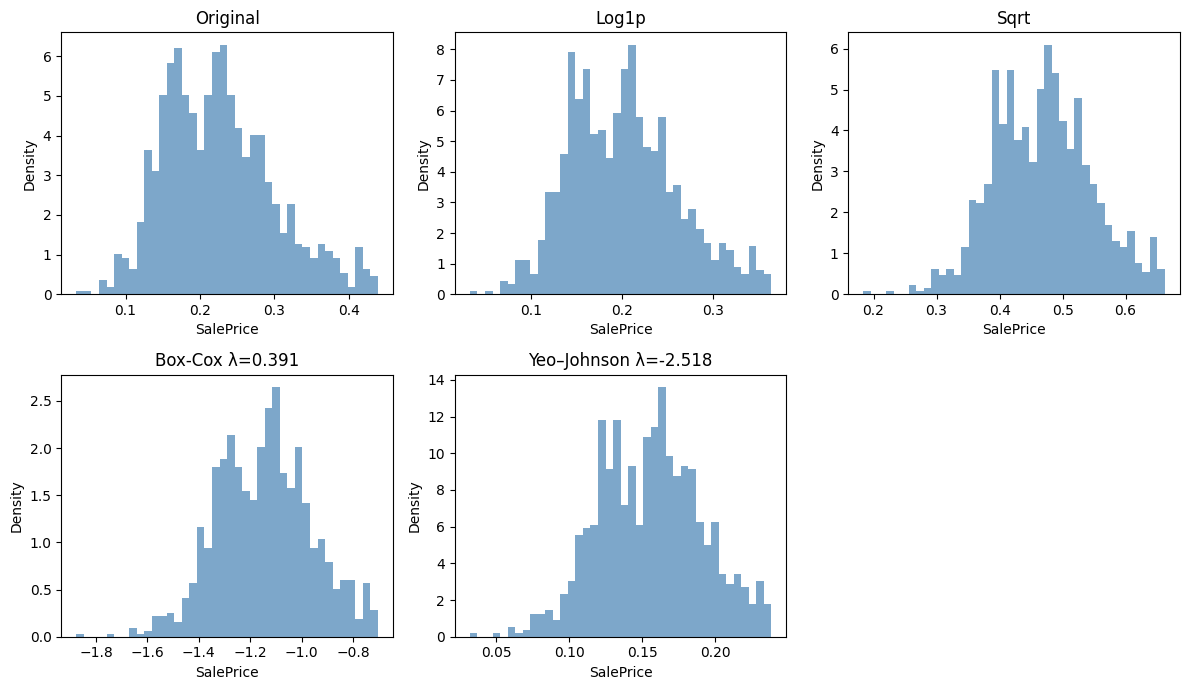

No need to skewness


In [15]:
# TODO: Check skewness of numerical features.
# Apply log, sqrt, Box-Cox, or Yeo-Johnson depending on distribution.

from scipy.stats import skew, kurtosis, jarque_bera, boxcox
from sklearn.preprocessing import PowerTransformer
import warnings

# Ignore warnings that might arise from transformations on certain data types
warnings.filterwarnings("ignore")

# --- Metrics helper ---
def metrics(vec):
    # Convert to pandas Series to use .nunique()
    vec_series = pd.Series(vec)
    # Check if the vector is constant
    if vec_series.nunique() <= 1:
        return np.nan, np.nan, np.nan # Return NaN for metrics if data is constant

    sk = skew(vec, nan_policy='omit')
    ku = kurtosis(vec, fisher=True, nan_policy='omit')  # 0 = normal
    jb_stat, jb_p = jarque_bera(vec)
    return sk, ku, jb_p


# numerical_cols = df.select_dtypes(include=np.number).columns
for col in df[col_num]:
  print(col)
  x = df[col].astype(float)

  # Check if the column is constant before attempting transformations
  if x.nunique() <= 1:
      print("  Column is constant, skipping transformations.")
      rows = [("Original", *metrics(x))]
  else:
      # --- Transformations ---
      x_log   = np.log1p(x)                        # log(1+x)
      x_sqrt  = np.sqrt(x)                         # sqrt
      # Box-Cox needs >0. Add a small constant to handle zero values.
      # Also check if the transformed data is constant after transformation.
      try:
        x_bc, lam_bc = boxcox(x + 1e-6)
        if np.all(x_bc == x_bc[0]):
             x_bc = np.full_like(x_bc, np.nan) # Fill with NaN if transformed data is constant
             lam_bc = np.nan
      except ValueError:
          x_bc = np.full_like(x, np.nan)
          lam_bc = np.nan


      pt = PowerTransformer(method="yeo-johnson", standardize=False)
      # Reshape for PowerTransformer and then flatten back
      x_yj = pt.fit_transform(x.values.reshape(-1,1)).ravel()
      # Check if the transformed data is constant after transformation.
      if np.all(x_yj == x_yj[0]):
          x_yj = np.full_like(x_yj, np.nan) # Fill with NaN if transformed data is constant


      # --- Report ---
      rows = [
          ("Original", *metrics(x)),
          ("Log1p", *metrics(x_log)),
          ("Sqrt", *metrics(x_sqrt)),
          (f"Box-Cox λ={lam_bc:.3f}" if not np.isnan(lam_bc) else "Box-Cox", *metrics(x_bc)),
          (f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}", *metrics(x_yj))
      ]

  report = pd.DataFrame(rows, columns=["Transform","Skewness","Kurtosis","JB-p"])
  print(report)

  # --- Plots (2×3 grid) ---
  if x.nunique() > 1: # Only plot if the original data is not constant
      fig, axes = plt.subplots(2, 3, figsize=(12, 7))
      titles = ["Original","Log1p","Sqrt",f"Box-Cox λ={lam_bc:.3f}" if not np.isnan(lam_bc) else "Box-Cox",f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}"]
      data = [x, x_log, x_sqrt, x_bc, x_yj]

      for ax, d, title in zip(axes.ravel(), data, titles):
          # Only plot if the data is not constant (check if not all NaNs)
          if not np.all(np.isnan(d)):
              ax.hist(d, bins=40, density=True, color="steelblue", alpha=0.7)
              ax.set_title(title)
              ax.set_xlabel(col); ax.set_ylabel("Density")
          else:
              ax.set_title(f"{title}\n(Constant data)")
              ax.set_xlabel(col); ax.set_ylabel("Density")


      fig.delaxes(axes[1,2])  # remove empty subplot
      fig.tight_layout()
      plt.show()
  print('No need to skewness')

## 🔹 Step 10: Remove Duplicates

In [16]:
# TODO: Check and remove duplicate rows if there is.

# count duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

# (optional) inspect some duplicate rows
if dup_count:
    display(df[df.duplicated(keep=False)].head())

# drop duplicates (keep first occurrence) and reset index
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(f"Rows after dropping duplicates: {len(df)}")


Duplicate rows: 0
Rows after dropping duplicates: 1084


## 💾 Step 11: Save Cleaned Dataset

In [17]:
# Save your final cleaned and engineered dataset to CSV.
df.to_csv("AmesHousing_engineered.csv", index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!
